In [2]:
import qutip as qt
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import lru_cache
import requests

In [3]:
# グラフ設定
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')
mpl.rcParams.update({
    "axes.labelsize": 18,   # 軸ラベル
    "xtick.labelsize": 16,  # 目盛り数字
    "ytick.labelsize": 16,
    "lines.linewidth": 2.2, # 線の太さ
    "axes.titlesize": 16,
})

def inward_ticks(ax, major_len=7, minor_len=4, width=1.2):
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True, length=major_len, width=width)
    ax.tick_params(which='minor', length=minor_len, width=width)

markers = ['o', '^', 's', 'D', 'x']
OUTDIR = Path("../../charts/tfim2")

# データ保存
DATADIR = Path("../../data/tfim")

# データ読み込み(あれば)
# fname = DATADIR / "SA_vs_Tcut_N12_hx0.0-0.4-0.5-0.6-0.7-1.0.npz"
fname_cri = DATADIR / "SA_vs_hx_N6-12-18-24.npz"

# dat = np.load(fname)
dat_cri = np.load(fname_cri)

# important
# N_list  = dat["N"]   # shape (nN,)
# hx_list = dat["hx_list"]  # shape (nHx,)
# Tcut_list = dat["Tcut_list"]
# EE      = dat["SA"]       # shape (nN, nHx)
# critical
N_list_cri  = dat_cri["N_list"]   # shape (nN,)
hx_list_cri = dat_cri["hx_list"]  # shape (nHx,)
EE_cri      = dat_cri["EE"]       # shape (nN, nHx)

graph gen done


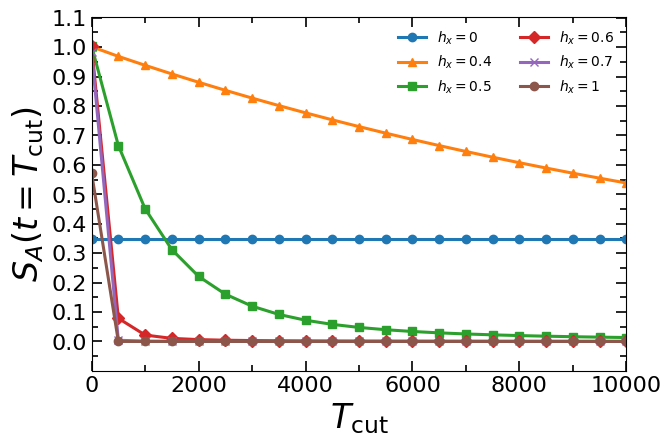

In [8]:
fig4, ax4 = plt.subplots(figsize=(6.9, 4.6))
for j, hx in enumerate(hx_list):
    mk = markers[j % len(markers)]
    ax4.plot(
        Tcut_list, EE[j],
        marker=mk, markersize=6.0,
        label=fr"$h_x={hx:g}$",
        linewidth=2.2
    )

inward_ticks(ax4)
ax4.set_xlim(0.0, 10000.0)
ax4.set_xlabel(r"$T_{\rm cut}$", fontsize=24)

# 外れる可能性もあるのでデータに合わせて少しマージンをとる
ymin = EE.min() - 0.1
ymax = EE.max() + 0.1
ax4.set_ylim(ymin, ymax)

ax4.set_ylabel(r"$S_A(t=T_{\rm cut})$", fontsize=24)
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_minor_locator(MultipleLocator(0.05))
ax4.xaxis.set_major_locator(MultipleLocator(2000))
ax4.xaxis.set_minor_locator(MultipleLocator(1000))
ax4.legend(frameon=False, ncol=2)

print(f"graph gen done")

# 先に保存してから show する方が安全
pdf_path = OUTDIR / f"SA_vs_Tcut_N12_hx0.0-0.4-0.5-0.6-0.7-1.0.pdf"
fig4.savefig(pdf_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close(fig4)

In [1]:
fig2, ax2 = plt.subplots(figsize=(6.9, 4.6))
# 色: 既に "purple", "gray" がある前提で、赤～灰系を外して
color_map = ["purple", "gray", "teal", "goldenrod"]  # ティール/金色で見分けやすい

# マーカー: 「バツ」「四角」に加えて、丸・三角以外から2つ
# 'x' = バツ, 's' = 四角, 'D' = ひし形, 'h' = 六角形
marker_map = ["x", "s", "D", "h"]

for j, N in enumerate(N_list_cri):
    mk = markers[j % len(markers)]
    ax2.plot(hx_list_cri, EE_cri[j]/np.log(2), color=color_map[j], marker=marker_map[j], markersize=6.0, label=fr"$N={N:g}$", linewidth=2.2)

nstamp = '-'.join(map(str, N_list_cri))
inward_ticks(ax2)
ax2.set_xlim(hx_list_cri.min(), hx_list_cri.max())
ax2.set_xlabel(r"$h_x$", fontsize=24)
ax2.set_ylim(-0.05, 1.1)
ax2.set_ylabel(r"$S_A(T_{\rm cut}=0)$", fontsize=24)        
ax2.xaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.legend(frameon=False, title=fr"$N={N:g}$")
plt.show()
fig2.savefig(OUTDIR / f"SA_vs_hx_N6-12-18-24_detailed.pdf", bbox_inches="tight", dpi=300)

NameError: name 'plt' is not defined

In [6]:
tol = 1e-12
for i, N in enumerate(N_list_cri):
    print(f"If N is {N}")   
    row = EE_cri[i]
    m = np.nanmax(row)
    for j, hx in enumerate(hx_list_cri):
        arrow = " → peak" if abs(row[j] - m) <= tol else ""
        print(f"SA is {EE_cri[i][j] / np.log(2)}, when hx is {hx}{arrow}")

If N is 6
SA is 0.5570886936156134, when hx is 0.0
SA is 1.0000006090557032, when hx is 0.05
SA is 1.0000060777032749, when hx is 0.1
SA is 1.0000083422872899, when hx is 0.15000000000000002 → peak
SA is 0.9999373255911247, when hx is 0.2
SA is 0.9995817627224746, when hx is 0.25
SA is 0.9984848150479947, when hx is 0.30000000000000004
SA is 0.9958278499738931, when hx is 0.35000000000000003
SA is 0.9903349549358087, when hx is 0.4
SA is 0.9802609009825936, when hx is 0.45
SA is 0.9635524522686334, when hx is 0.5
SA is 0.9031382507864236, when hx is 0.6
SA is 0.8053044576765576, when hx is 0.7
SA is 0.6868095978606661, when hx is 0.7999999999999999
SA is 0.571452733976526, when hx is 0.8999999999999999
SA is 0.4731866425057345, when hx is 0.9999999999999999
SA is 0.39471966809324605, when hx is 1.0999999999999999
SA is 0.33340252473949755, when hx is 1.1999999999999997
SA is 0.28544544341980166, when hx is 1.2999999999999998
SA is 0.24752451295121847, when hx is 1.4
SA is 0.21709977812